##### 1)Import Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai',context = 'notebook',ticks = True,grid = False)

In [3]:
admission_df =pd.read_csv('Admission_Predict.csv')

In [4]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admission_df.drop('Serial No.',axis=1,inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


###### 2) Perform Exploratory Data Analysis

In [6]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


###### 3)Perform Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF22207B48>,
      dtype=object)

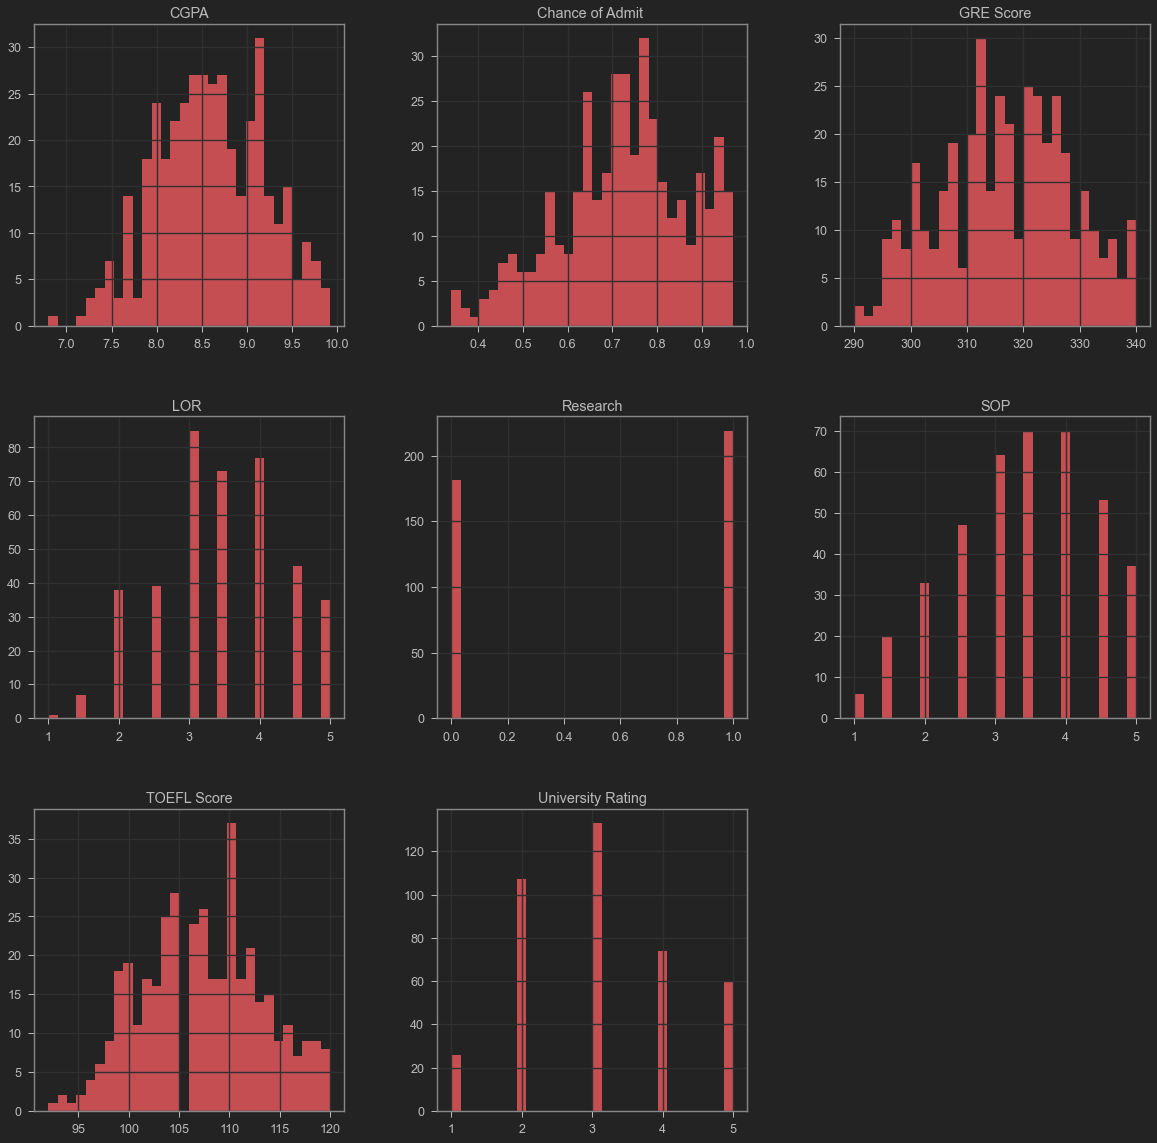

In [10]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'r')

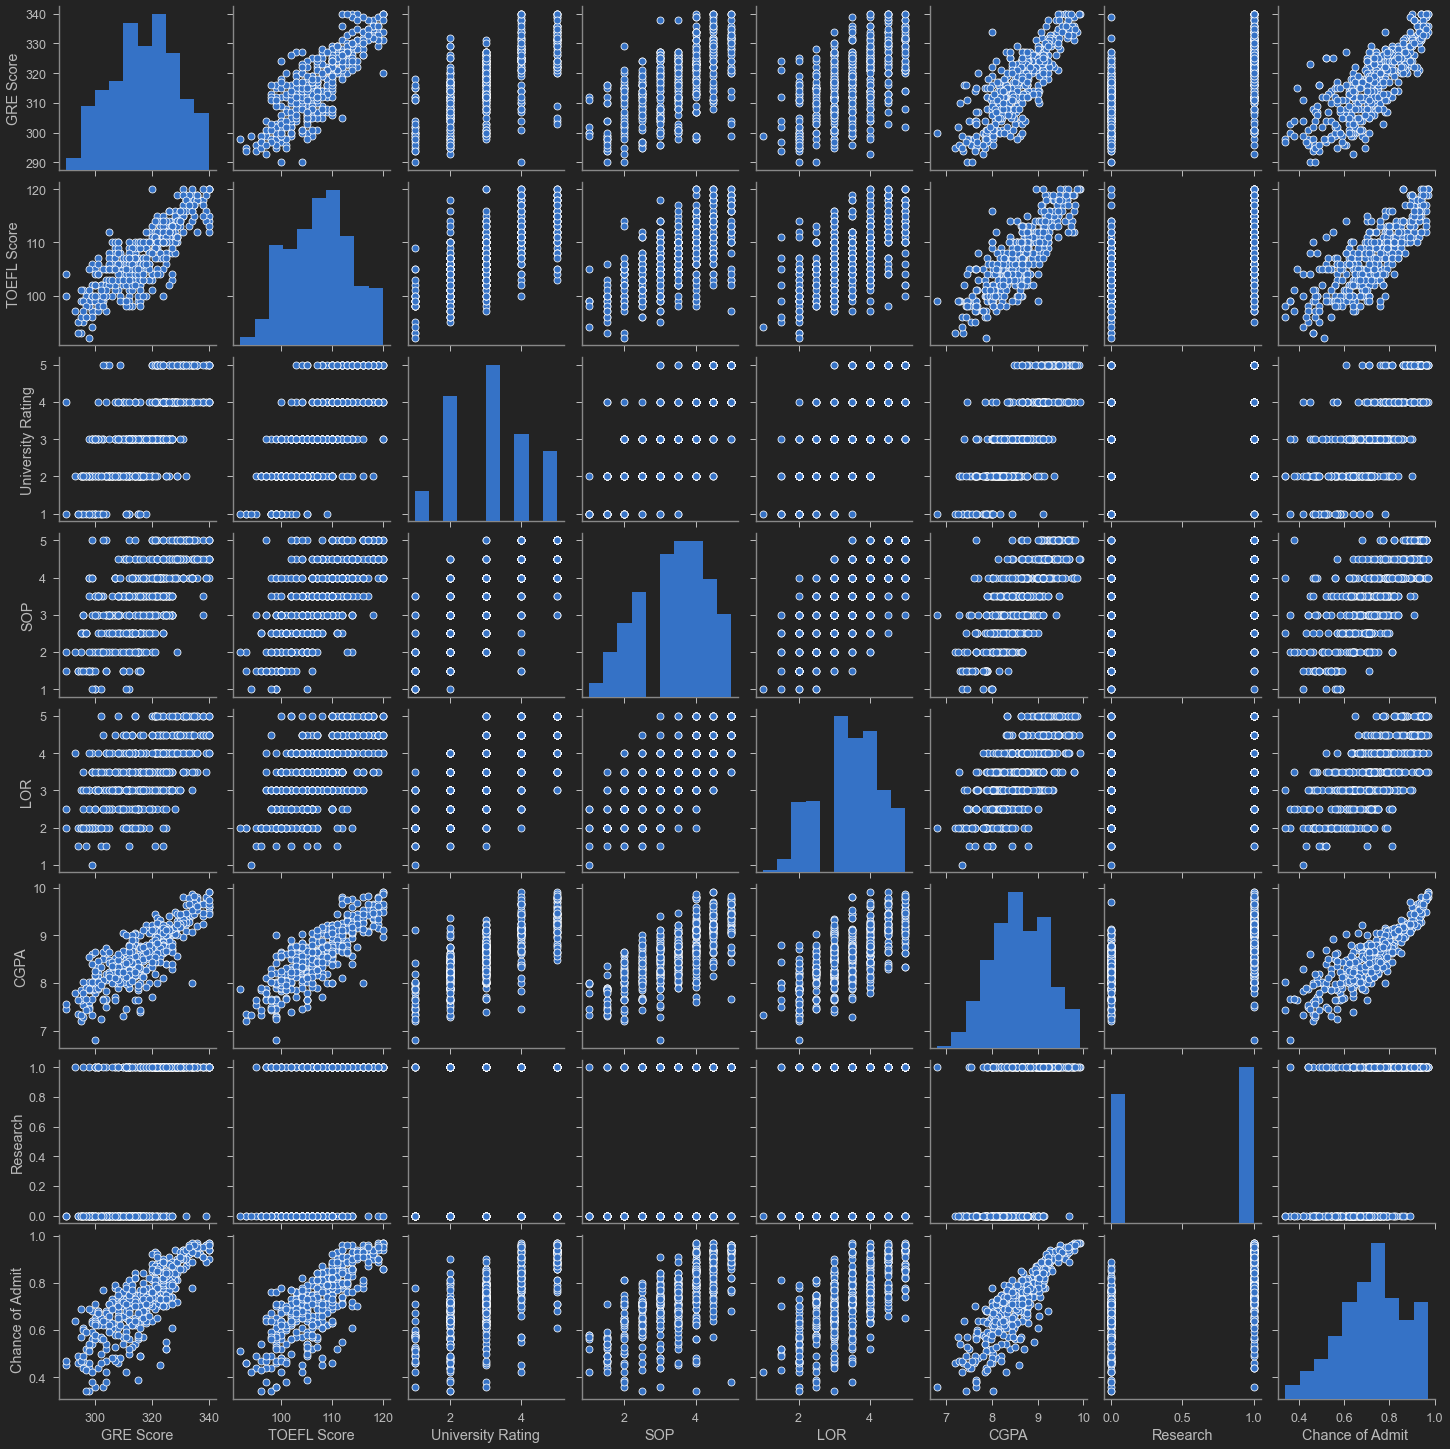

In [11]:
sns.pairplot(admission_df)

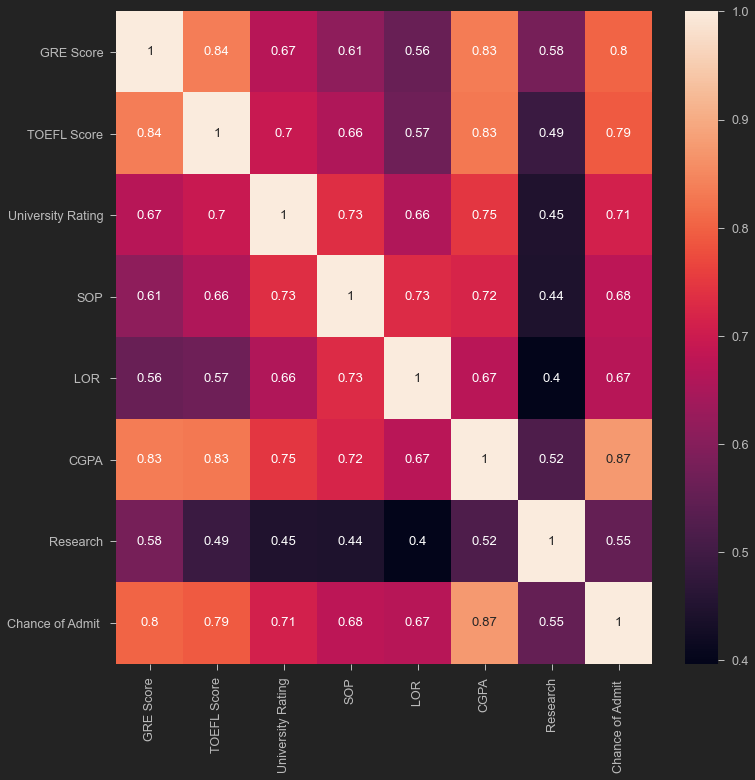

In [12]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix,annot = True)
plt.show()

###### 4)Create Training and Testing Dataset

In [13]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
X = admission_df.drop(columns = ['Chance of Admit '])

In [15]:
Y = admission_df['Chance of Admit ']

In [16]:
print(X.shape)
print(Y.shape)

(400, 7)
(400,)


In [17]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [18]:
X = np.array(X)
Y = np.array(Y)

In [19]:
Y = Y.reshape(-1,1)

In [20]:
Y.shape

(400, 1)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [22]:
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.15)

###### 5)Train and Evaluate a linear Regression model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [25]:
LinearReg_model = LinearRegression()
LinearReg_model.fit(X_train,Y_train)

LinearRegression()

In [26]:
accuracy_Lin = LinearReg_model.score(X_test,Y_test)
accuracy_Lin

0.8189733488677593

###### 6)Train and Evaluate a ANN model

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50,input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse',optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [29]:
ANN_model.compile(optimizer = 'Adam',loss = 'mean_squared_error')

In [30]:
epochs_hist = ANN_model.fit(X_train,Y_train,epochs = 100,batch_size = 20)

Train on 340 samples
Epoch 1/100
340/340 [==============================] - 4s 13ms/sample - loss: 0.6055
Epoch 2/100
340/340 [==============================] - 0s 194us/sample - loss: 0.4244
Epoch 3/100
340/340 [==============================] - 0s 211us/sample - loss: 0.3736
Epoch 4/100
340/340 [==============================] - 0s 186us/sample - loss: 0.3042
Epoch 5/100
340/340 [==============================] - 0s 200us/sample - loss: 0.2992
Epoch 6/100
340/340 [==============================] - 0s 281us/sample - loss: 0.2773
Epoch 7/100
340/340 [==============================] - 0s 195us/sample - loss: 0.2714
Epoch 8/100
340/340 [==============================] - 0s 172us/sample - loss: 0.2888
Epoch 9/100
340/340 [==============================] - 0s 194us/sample - loss: 0.2536
Epoch 10/100
340/340 [==============================] - 0s 160us/sample - loss: 0.2630
Epoch 11/100
340/340 [==============================] - 0s 165us/sample - loss: 0.2793
Epoch 12/100
340/340 [==========

340/340 [==============================] - 0s 236us/sample - loss: 0.1342
Epoch 95/100
340/340 [==============================] - 0s 209us/sample - loss: 0.1214
Epoch 96/100
340/340 [==============================] - 0s 199us/sample - loss: 0.1229
Epoch 97/100
340/340 [==============================] - 0s 205us/sample - loss: 0.1183
Epoch 98/100
340/340 [==============================] - 0s 218us/sample - loss: 0.1219
Epoch 99/100
340/340 [==============================] - 0s 176us/sample - loss: 0.1302
Epoch 100/100
340/340 [==============================] - 0s 243us/sample - loss: 0.1263


In [31]:
result = ANN_model.evaluate(X_test,Y_test)
print(result)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

60/60 [==============================] - 0s 7ms/sample - loss: 0.1874
0.1873535285393397
Accuracy : 0.8126464714606603


In [32]:
epochs_hist.history.keys()

dict_keys(['loss'])

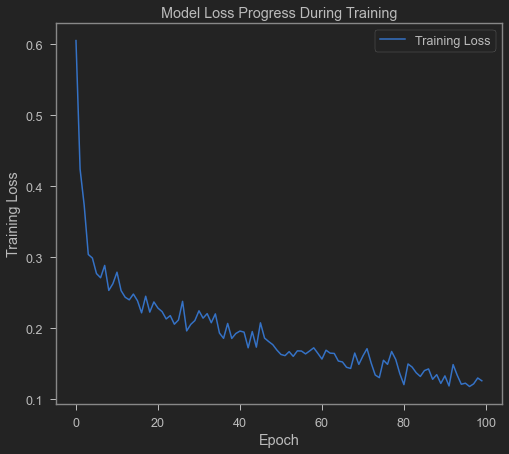

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

###### 7)Train and Evaluate Decision Tree and Random Forest  Models

In [34]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [35]:
accuracy_DecisionTree = DecisionTree_model.score(X_test,Y_test)
accuracy_DecisionTree

0.4749858035644212

In [36]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators= 100,max_depth=10)
RandomForest_model.fit(X_train,Y_train.ravel())

RandomForestRegressor(max_depth=10)

In [37]:
accuracy_RandomForest = RandomForest_model.score(X_test,Y_test)
accuracy_RandomForest

0.7888214737271022

###### 8)Calculate Regression Model KPI's

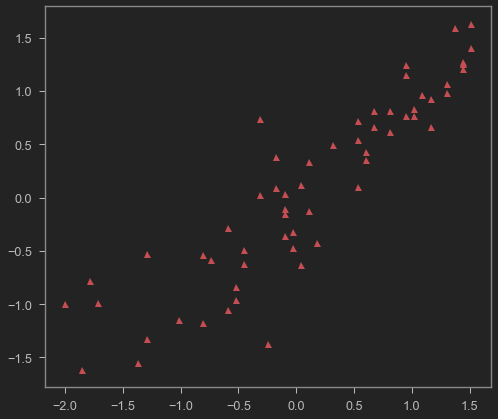

In [38]:
Y_pred = LinearReg_model.predict(X_test)
plt.plot(Y_test,Y_pred, '^',color = 'r')

In [39]:
Y_pred_original = scaler_y.inverse_transform(Y_pred)
Y_test_original = scaler_y.inverse_transform(Y_test)

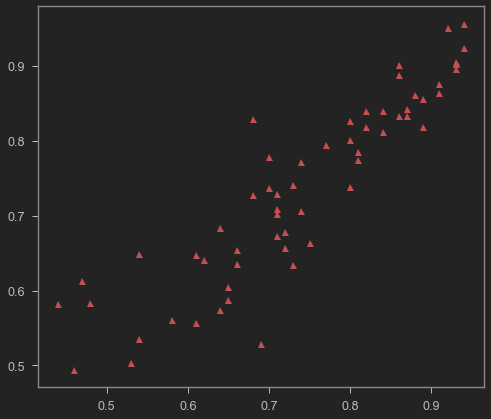

In [40]:
plt.plot(Y_test_original,Y_pred_original,'^',color = 'r')

In [41]:
k = X_test.shape[1]
k

7

In [42]:
n = len(X_test)
n

60

In [43]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(Y_test_original,Y_pred_original)),'.3f'))
MSE = mean_squared_error(Y_test_original,Y_pred_original)
MAE = mean_absolute_error(Y_test_original,Y_pred_original)
r2 = r2_score(Y_test_original,Y_pred_original)
adj_r2 = 1 - (1 - r2) * (n - 1)/(n - k - 1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =',adj_r2)

RMSE = 0.057 
MSE = 0.003267586366635901 
MAE = 0.04351238488711411 
R2 = 0.8189733488677593 
Adjusted R2 = 0.7946043765999576
